### Домашнє завдання: Кластеризація в Аналізі Персоналій Клієнтів

#### Контекст
В цьому ДЗ ми скористаємось алгоритмами кластеризації для задачі аналізу портретів клієнтів (Customer Personality Analysis).

Customer Personality Analysis - це аналіз різних сегментів клієнтів компанії. Цей аналіз дозволяє бізнесу краще розуміти своїх клієнтів і полегшує процес адаптації продуктів під конкретні потреби, поведінку та інтереси різних типів клієнтів.

Аналіз портретів клієнтів допомагає бізнесу змінювати свій продукт на основі цільової аудиторії, розділеної на різні сегменти. Наприклад, замість того, щоб витрачати гроші на маркетинг нового продукту для всіх клієнтів у базі даних компанії, бізнес може проаналізувати, який сегмент клієнтів найімовірніше придбає продукт, і потім зосередити маркетингові зусилля лише на цьому сегменті.

#### Завдання
На основі наданих даних в файлі `marketing_campaign.csv` потрібно виконати кластеризацію, щоб виявити сегменти клієнтів.

#### Вхідні дані
Вам надано набір даних з такими атрибутами:

**Характеристики користувачів:**
- `ID`: Унікальний ідентифікатор клієнта
- `Year_Birth`: Рік народження клієнта
- `Education`: Рівень освіти клієнта
- `Marital_Status`: Сімейний стан клієнта
- `Income`: Річний дохід домогосподарства клієнта
- `Kidhome`: Кількість дітей у домогосподарстві клієнта
- `Teenhome`: Кількість підлітків у домогосподарстві клієнта
- `Dt_Customer`: Дата реєстрації клієнта у компанії
- `Recency`: Кількість днів з моменту останньої покупки клієнта
- `Complain`: 1, якщо клієнт скаржився за останні 2 роки, 0 - якщо ні

**Продукти:**
- `MntWines`: Сума, витрачена на вино за останні 2 роки
- `MntFruits`: Сума, витрачена на фрукти за останні 2 роки
- `MntMeatProducts`: Сума, витрачена на м'ясні продукти за останні 2 роки
- `MntFishProducts`: Сума, витрачена на рибні продукти за останні 2 роки
- `MntSweetProducts`: Сума, витрачена на солодощі за останні 2 роки
- `MntGoldProds`: Сума, витрачена на золото за останні 2 роки

**Акції:**
- `NumDealsPurchases`: Кількість покупок, зроблених з використанням знижок
- `AcceptedCmp1`: 1, якщо клієнт прийняв пропозицію у першій кампанії, 0 - якщо ні
- `AcceptedCmp2`: 1, якщо клієнт прийняв пропозицію у другій кампанії, 0 - якщо ні
- `AcceptedCmp3`: 1, якщо клієнт прийняв пропозицію у третій кампанії, 0 - якщо ні
- `AcceptedCmp4`: 1, якщо клієнт прийняв пропозицію у четвертій кампанії, 0 - якщо ні
- `AcceptedCmp5`: 1, якщо клієнт прийняв пропозицію у п'ятій кампанії, 0 - якщо ні
- `Response`: 1, якщо клієнт прийняв пропозицію в останній кампанії, 0 - якщо ні

**Взаємодія з компанією:**
- `NumWebPurchases`: Кількість покупок, зроблених через вебсайт компанії
- `NumCatalogPurchases`: Кількість покупок, зроблених за каталогом
- `NumStorePurchases`: Кількість покупок, зроблених безпосередньо у магазинах
- `NumWebVisitsMonth`: Кількість відвідувань вебсайту компанії за останній місяць


**Завдання 1**. Завантажте дані з `marketing_campaign.csv` в Pandas dataframe і виведіть основну інформацію про дані: скільки всього рядків і колонок, які типи даних мають колонки, скільки пропущених значень.

In [5]:
import pandas as pd
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/marketing_campaign.csv')

In [6]:
# Виводимо основну інформацію про дані
print("Кількість рядків і колонок:", train_df.shape)
print("\nТипи даних кожної колонки:\n", train_df.dtypes)
print("\nКількість пропущених значень у кожній колонці:\n", train_df.isnull().sum())

Кількість рядків і колонок: (2240, 29)

Типи даних кожної колонки:
 ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

Кількість пропущен

In [7]:
train_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19/01/2014,94,173,...,5,0,0,0,0,0,0,3,11,0


**Завдання 2.** Заповніть пропущені значення з врахуванням того завдання (кластеризація), яке ми виконуємо. Поясніть свій вибір заповнення пропущених значень.

In [8]:
# Заповнення пропущених значень медіаною
median_income = train_df['Income'].median()
train_df['Income'].fillna(median_income, inplace=True)

# Перевірка результатів
print("Кількість пропущених значень у колонці 'Income' після заповнення:", train_df['Income'].isnull().sum())

Кількість пропущених значень у колонці 'Income' після заповнення: 0


Заповнення пропущених значень медіаною краще для випадків з асиметричним розподілом доходів або наявністю викидів, що часто трапляється у маркетингових даних.

**Завдання 3.** У нас є декілька колонок з категоріальними значеннями та одна колонка з датою. Як би ви обробили ці колонки для того, аби передати їх в алгоритм кластеризації?

Реалізуйте обробку категоріальних колонок і колонки з датою та перетворіть їх на ознаки, корисні для кластеризації з вашого погляду.

In [9]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding для категоріальних колонок
le = LabelEncoder()
train_df['Education'] = le.fit_transform(train_df['Education'])
train_df['Marital_Status'] = le.fit_transform(train_df['Marital_Status'])

In [11]:
# Перетворення колонки з датою в формат datetime з врахуванням формату дати
train_df['Dt_Customer'] = pd.to_datetime(train_df['Dt_Customer'], dayfirst=True, errors='coerce')

# Перевірка, чи все правильно конвертувалось
print(train_df['Dt_Customer'].head())

# Додавання нової ознаки - рік приєднання
train_df['Year_Customer'] = train_df['Dt_Customer'].dt.year

# Додавання нової ознаки - кількість днів з моменту приєднання
current_date = pd.to_datetime('today')
train_df['Days_Customer'] = (current_date - train_df['Dt_Customer']).dt.days

# Видалення оригінальної колонки дати
train_df.drop(columns=['Dt_Customer'], inplace=True)

0   2012-09-04
1   2014-03-08
2   2013-08-21
3   2014-02-10
4   2014-01-19
Name: Dt_Customer, dtype: datetime64[ns]


In [12]:
train_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Year_Customer,Days_Customer
0,5524,1957,2,4,58138.0,0,0,58,635,88,...,0,0,0,0,0,3,11,1,2012,4381
1,2174,1954,2,4,46344.0,1,1,38,11,1,...,0,0,0,0,0,3,11,0,2014,3831
2,4141,1965,2,5,71613.0,0,0,26,426,49,...,0,0,0,0,0,3,11,0,2013,4030
3,6182,1984,2,5,26646.0,1,0,26,11,4,...,0,0,0,0,0,3,11,0,2014,3857
4,5324,1981,4,3,58293.0,1,0,94,173,43,...,0,0,0,0,0,3,11,0,2014,3879


**Завдання 4**.
1. Запишіть в змінну X ті дані, які будете кластеризувати.
2. Побудуйте кластеризацію з KMeans на 3 кластери.
3. Обчисліть метрику силуету для цієї кластеризації.

In [13]:
# Збережемо дані для кластеризації у змінну X (усі числові колонки)
X = train_df.copy()

# Перевірка підготовлених даних
print(X.head())

     ID  Year_Birth  Education  Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957          2               4  58138.0        0         0   
1  2174        1954          2               4  46344.0        1         1   
2  4141        1965          2               5  71613.0        0         0   
3  6182        1984          2               5  26646.0        1         0   
4  5324        1981          4               3  58293.0        1         0   

   Recency  MntWines  MntFruits  ...  AcceptedCmp4  AcceptedCmp5  \
0       58       635         88  ...             0             0   
1       38        11          1  ...             0             0   
2       26       426         49  ...             0             0   
3       26        11          4  ...             0             0   
4       94       173         43  ...             0             0   

   AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  \
0             0             0         0    

In [14]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Стандартизація даних
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Створення моделі KMeans з 3 кластерами
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Отримання міток кластерів
labels = kmeans.labels_

# Додавання міток кластерів до DataFrame (необов'язково)
train_df['Cluster'] = labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [15]:
from sklearn.metrics import silhouette_score

# Обчислення метрики силуету
silhouette_avg = silhouette_score(X_scaled, labels)

print(f"Середня метрика силуету для кластеризації: {silhouette_avg:.4f}")

Середня метрика силуету для кластеризації: 0.1464


**Завдання 5.** Візуалізуйте знайдені кластери разом з наявними даними та проаналізуйте кластери. У нас ознак більше, ніж 2 або 3, тож, тут треба подумати, які саме ознаки варто використати для візуалізації аби вони були інформативними. Рекомендую точно звернути увагу на харакетиристики про дохід користувачів і те, як вони взаємодять з магазинок (кількість покупок і тд).

Для візуалізації зручно може бути використати `plotly.express.scatter_3d` для 3D графіку розсіювання, але тут можна скористатись будь-яким зрозумілим і зручним для вас методом візуалізації. Опишіть свої спостереження, чи кластери мають сенс?

In [16]:
import plotly.express as px

# Створення 3D графіку розсіювання
fig = px.scatter_3d(train_df,
                    x='Income',
                    y='NumStorePurchases',
                    z='NumWebPurchases',
                    color='Cluster',  # Відображення кластерів за кольором
                    symbol='Cluster',  # Додатково використаємо різні символи для кластерів
                    title='3D візуалізація кластерів',
                    labels={'Income':'Дохід', 'NumStorePurchases':'Покупки в магазині', 'NumWebPurchases':'Покупки онлайн'}
                   )

# Відображення графіку
fig.show()

**Завдання 6**. Масштабуйте дані і побудуйте знову кластеризацію KMeans на 3 кластери і обчисліть метрику силуету. Опишіть порівняння з експериментом без масштабування значень.

In [17]:
from sklearn.preprocessing import StandardScaler

# Масштабування даних
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
from sklearn.cluster import KMeans

# Створення моделі KMeans з 3 кластерами
kmeans_scaled = KMeans(n_clusters=3, random_state=42)
kmeans_scaled.fit(X_scaled)

# Отримання міток кластерів
labels_scaled = kmeans_scaled.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [19]:
from sklearn.metrics import silhouette_score

# Обчислення метрики силуету для масштабованих даних
silhouette_avg_scaled = silhouette_score(X_scaled, labels_scaled)

print(f"Середня метрика силуету для кластеризації з масштабуванням: {silhouette_avg_scaled:.4f}")

Середня метрика силуету для кластеризації з масштабуванням: 0.1464


Середня метрика силуету для кластеризації з та без масштабування - 0.1464, що в даному кейсі свідчить про те, що масшабування не є покращенням.

**Завдання 7.** З візуалізацій на попередньому кроці ви могли побачити якісь викиди в даних. Опрацюйте викиди (можна видалити ці рядки або придумати інший спосіб).

In [20]:
import numpy as np

# Функція для виявлення викидів за допомогою межквартильного розмаху
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

# Виявлення викидів у кількох важливих колонках
income_outliers = detect_outliers_iqr(train_df['Income'])
store_purchases_outliers = detect_outliers_iqr(train_df['NumStorePurchases'])
web_purchases_outliers = detect_outliers_iqr(train_df['NumWebPurchases'])

# Об'єднання індексів рядків з викидами
outlier_indices = set(income_outliers.index).union(store_purchases_outliers.index).union(web_purchases_outliers.index)

# Видалення рядків з викидами
train_df_cleaned = train_df.drop(index=outlier_indices)

print(f"Кількість рядків після видалення викидів: {train_df_cleaned.shape[0]}")

Кількість рядків після видалення викидів: 2228


In [21]:
# Масштабування оновлених даних
X_cleaned = train_df_cleaned.drop(columns=['Cluster'])  # Видаляємо колонку з попередніми кластерами
X_cleaned_scaled = scaler.fit_transform(X_cleaned)

# Кластеризація після видалення викидів
kmeans_cleaned = KMeans(n_clusters=3, random_state=42)
kmeans_cleaned.fit(X_cleaned_scaled)

# Отримання міток кластерів
labels_cleaned = kmeans_cleaned.labels_

# Обчислення метрики силуету після видалення викидів
silhouette_avg_cleaned = silhouette_score(X_cleaned_scaled, labels_cleaned)

print(f"Середня метрика силуету після видалення викидів: {silhouette_avg_cleaned:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Середня метрика силуету після видалення викидів: 0.1497


Середня метрика силуету після видалення викидів (0.1497) трохи підвищилася порівняно з до видалення (0.1464). Це може вказувати на деякі покращення, але різниця є досить незначною.

**Завдання 8.** Виконайте Elbow method для пошуку оптимальної кількості кластерів та натренуйте KMeans з тою кількістю кластерів, яку Elbow method показав як оптимальну. Обчисліть метрику силуету. Візуалізуйте кластери. З яким набором даних (масштабованим чи ні) тут працювати - ваш вибір, можна зробити експеримент з обома.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

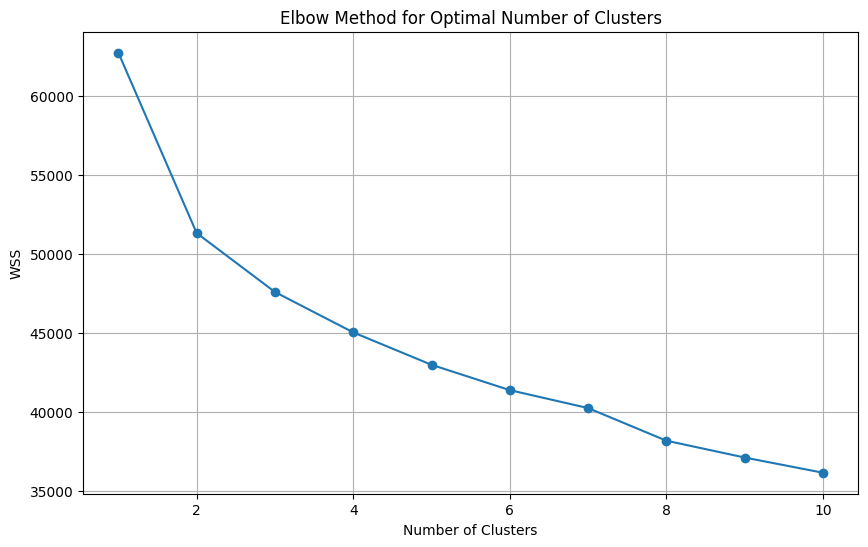

In [22]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Функція для виконання Elbow Method
def elbow_method(X):
    wss = []
    k_range = range(1, 11)  # Від 1 до 10 кластерів
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        wss.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(k_range, wss, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WSS')
    plt.title('Elbow Method for Optimal Number of Clusters')
    plt.grid(True)
    plt.show()

# Виконання Elbow Method на масштабованих даних
elbow_method(X_scaled)

In [23]:
optimal_clusters = 3

# Кластеризація з KMeans
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_optimal.fit(X_scaled)

# Отримання міток кластерів
labels_optimal_scaled = kmeans_optimal.labels_

# Обчислення метрики силуету
silhouette_avg_optimal_scaled = silhouette_score(X_scaled, labels_optimal_scaled)

print(f"Середня метрика силуету для масштабованих даних з {optimal_clusters} кластерами: {silhouette_avg_optimal_scaled:.4f}")

Середня метрика силуету для масштабованих даних з 3 кластерами: 0.1464


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [24]:
# Кластеризація з KMeans для немасштабованих даних
kmeans_optimal_raw = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_optimal_raw.fit(X)

# Отримання міток кластерів
labels_optimal_raw = kmeans_optimal_raw.labels_

# Обчислення метрики силуету для немасштабованих даних
silhouette_avg_optimal_raw = silhouette_score(X, labels_optimal_raw)

print(f"Середня метрика силуету для немасштабованих даних з {optimal_clusters} кластерами: {silhouette_avg_optimal_raw:.4f}")


Середня метрика силуету для немасштабованих даних з 3 кластерами: 0.5690


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [25]:
import plotly.express as px

# Додавання міток кластерів до DataFrame
train_df['Cluster'] = labels_optimal_scaled

# Візуалізація 3D графіку
fig_scaled = px.scatter_3d(train_df,
                          x='Income',
                          y='NumStorePurchases',
                          z='NumWebPurchases',
                          color='Cluster',
                          title='3D візуалізація кластерів (масштабовані дані)',
                          labels={'Income':'Дохід', 'NumStorePurchases':'Покупки в магазині', 'NumWebPurchases':'Покупки онлайн'}
                         )

fig_scaled.show()

In [26]:
# Додавання міток кластерів до DataFrame
train_df['Cluster'] = labels_optimal_raw

# Візуалізація 3D графіку
fig_raw = px.scatter_3d(train_df,
                       x='Income',
                       y='NumStorePurchases',
                       z='NumWebPurchases',
                       color='Cluster',
                       title='3D візуалізація кластерів (немасштабовані дані)',
                       labels={'Income':'Дохід', 'NumStorePurchases':'Покупки в магазині', 'NumWebPurchases':'Покупки онлайн'}
                      )

fig_raw.show()


**Завдання 9.** Використовуючи методи `scipy` `dendrogram, linkage, fcluster`
1. Побудуйте ієрархічну агломеративну кластеризацію з `single linkage` на даних невідмасштабованих, але з прибраним викидом.
2. Візуалізуйте дендрограму. При візуалізації обовʼязково задайте параметр `truncate_mode='lastp'` - це обріже дендрограму, без цього вона буде завелика, бо у нас тут даних суттєво більше, ніж в лекції.
3. Проаналізуйте дендрограму та побудуйте варіанти плоских кластеризацій з `fcluster` на 2 і 3 кластери. Візуалізуйте результати кожної з цих кластеризацій та зробіть висновок. Чи вважаєте ви якусь з цих кластеризацій вдалою? Що спостерігаєте з цих кластеризацій?
4. Порахуйте мерику силуету для цього методу кластеризації.

In [27]:
import pandas as pd
import numpy as np

# Припустимо, train_df_cleaned - це дані без викидів
X_cleaned = train_df_cleaned.drop(columns=['Cluster'])  # Видаляємо колонку з попередніми кластерами

# Вибір тільки числових ознак для кластеризації
X_cleaned = X_cleaned.select_dtypes(include=[np.number])

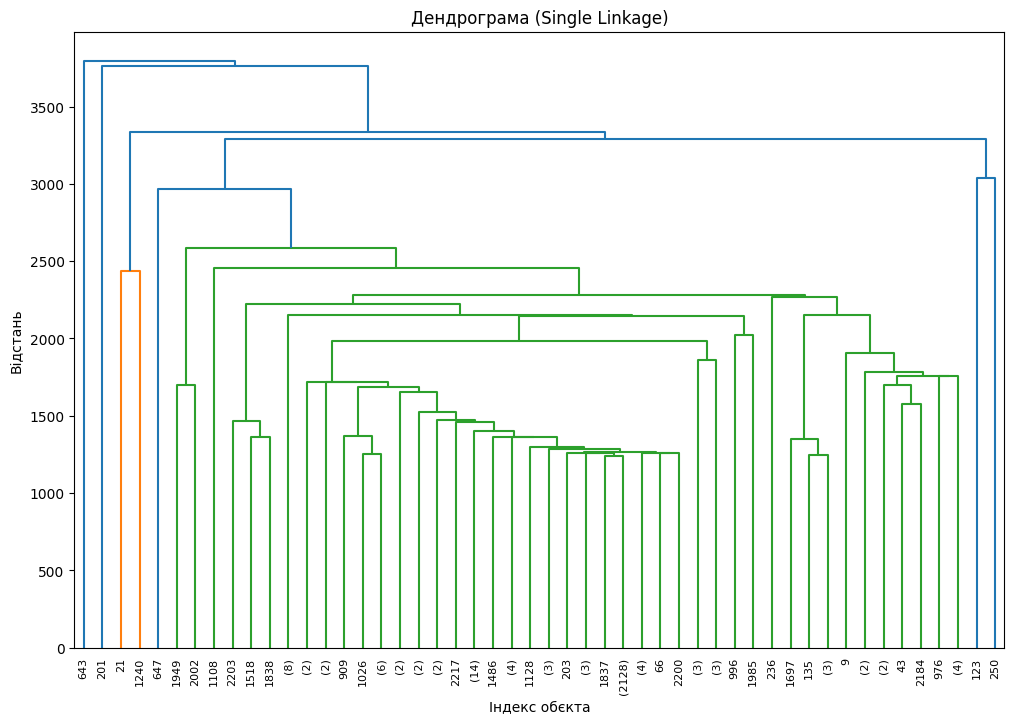

In [29]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Обчислення матриці відстаней та створення кластеризації
linkage_matrix = sch.linkage(X_cleaned, method='single')

# Візуалізація дендрограми
plt.figure(figsize=(12, 8))
sch.dendrogram(linkage_matrix, truncate_mode='lastp', p=50)
plt.title('Дендрограма (Single Linkage)')
plt.xlabel('Індекс обєкта')
plt.ylabel('Відстань')
plt.show()

In [30]:
from scipy.cluster.hierarchy import fcluster

# Кластеризація на 2 кластери
clusters_2 = fcluster(linkage_matrix, t=2, criterion='maxclust')

# Кластеризація на 3 кластери
clusters_3 = fcluster(linkage_matrix, t=3, criterion='maxclust')

# Додавання міток кластерів до DataFrame
train_df_cleaned['Cluster_2'] = clusters_2
train_df_cleaned['Cluster_3'] = clusters_3


In [31]:
from scipy.cluster.hierarchy import fcluster

# Кластеризація на 2 кластери
clusters_2 = fcluster(linkage_matrix, t=2, criterion='maxclust')

# Кластеризація на 3 кластери
clusters_3 = fcluster(linkage_matrix, t=3, criterion='maxclust')

# Додавання міток кластерів до DataFrame
train_df_cleaned['Cluster_2'] = clusters_2
train_df_cleaned['Cluster_3'] = clusters_3


In [32]:
import plotly.express as px

# Візуалізація для 2 кластерів
fig_2 = px.scatter_3d(train_df_cleaned,
                      x='Income',
                      y='NumStorePurchases',
                      z='NumWebPurchases',
                      color='Cluster_2',
                      title='3D візуалізація кластерів (2 кластери)',
                      labels={'Income':'Дохід', 'NumStorePurchases':'Покупки в магазині', 'NumWebPurchases':'Покупки онлайн'}
                     )
fig_2.show()

# Візуалізація для 3 кластерів
fig_3 = px.scatter_3d(train_df_cleaned,
                      x='Income',
                      y='NumStorePurchases',
                      z='NumWebVisitsMonth',  # Замініть на ознаку, що має сенс
                      color='Cluster_3',
                      title='3D візуалізація кластерів (3 кластери)',
                      labels={'Income':'Дохід', 'NumStorePurchases':'Покупки в магазині', 'NumWebVisitsMonth':'Візити на сайт'}
                     )
fig_3.show()


In [44]:
from sklearn.metrics import silhouette_score

# Обчислення метрики силуету для кластеризації з 2 кластерами
silhouette_avg_2 = silhouette_score(X_cleaned, clusters_2)
print(f"Середня метрика силуету для 2 кластерів: {silhouette_avg_2:.4f}")

# Обчислення метрики силуету для кластеризації з 3 кластерами
silhouette_avg_3 = silhouette_score(X_cleaned, clusters_3)
print(f"Середня метрика силуету для 3 кластерів: {silhouette_avg_3:.4f}")

Середня метрика силуету для 2 кластерів: 0.4628
Середня метрика силуету для 3 кластерів: 0.4250


Отже, метрика силуету 0.4628 є вищою, ніж 0.4250 для 3 кластерів. Це означає, що з точки зору якості кластеризації, дві групи надають кращий результат порівняно з трьома групами.

**Завдання 10.**
1. Використайте метод кластеризації, який ми не використовували в попередніх завданнях цього ДЗ (може бути ієрархічна кластеризація з іншим способом звʼязності або інші методи sklearn).
2. Порахуйте мер=трику силуету і візуалізуйте результат кластеризації. Зробіть висновок про те, чи могла б ця кластеризація бути корисною?

In [40]:
train_df_cleaned['Cluster_Agglomerative'] = clusters_agg

In [41]:
print(train_df_cleaned.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Year_Customer',
       'Days_Customer', 'Cluster', 'Cluster_2', 'Cluster_3',
       'Cluster_Agglomerative'],
      dtype='object')


In [42]:
from sklearn.cluster import AgglomerativeClustering

# Налаштування агломеративної кластеризації
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters_agg = agg_clustering.fit_predict(X_cleaned)

# Обчислення метрики силуету
silhouette_avg_agg = silhouette_score(X_cleaned, clusters_agg)
print(f"Середня метрика силуету для Agglomerative Clustering: {silhouette_avg_agg:.4f}")

# Візуалізація результатів
fig_agg = px.scatter_3d(train_df_cleaned,
                       x='Income',
                       y='NumStorePurchases',
                       z='NumWebPurchases',
                       color='Cluster_Agglomerative',
                       title='3D візуалізація кластерів (Agglomerative Clustering)',
                       labels={'Income':'Дохід', 'NumStorePurchases':'Покупки в магазині', 'NumWebPurchases':'Покупки онлайн'}
                      )
fig_agg.show()

Середня метрика силуету для Agglomerative Clustering: 0.4613


Отже, середня метрика силуету 0.4613 для Agglomerative Clustering значно краща за інші. Це означає, що Agglomerative Clustering забезпечує кращу структуру кластерів і розділяє дані на більш чіткі та однорідні групи. Результати кластеризації є досить чіткими та відокремленими. Кластери мають значно кращу структуру порівняно з KMeans після видалення викидів, де метрика була лише
0.1497. Але трошки слабшою ніж результат агломеративної кластеризації - 0.4625.